# Analysis of crosslinked dataset

This notebook compare mouse and trypanosome complexes in native and crosslinked experiments

In [18]:
%matplotlib inline
#importing usefull library
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as sch
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
from scripts.make_fig import *
from scripts.utilities import *


## Prepare Mark data.
This is a dataset of native and crosslinked proteins.
The crosllinking is performed in 6% formaldehyde on 80% confluen of adherent U2OS cells.
The dataset contains 4 replica for native and croslinked separation. 
We load the dataset and extract one crossilinked replica and one native replica for plotting.
##### Caveats: 
######  the native complex of mark is done on a SEC300 column
######  the 6% formaldehyde is addedd on live cells to crosslink membrane proteins

In [19]:
#import mark data and remove rubbish entires
in_file = 'test_small/mark_crosslink/proteinGroups.txt'
df = pd.DataFrame.from_csv(in_file, sep='\t')
print (df.shape)
mark_dsc_diz = dict(zip(df.index.values, df['Fasta headers']))
df = clean(df)

(7592, 2824)
removed  735 Only identified by site
tot  735  entries removed
---------------
removed  67 Reverse
tot  802  entries removed
---------------
removed  76 Potential contaminant
tot  878  entries removed
---------------
removed  403 Peptide counts (unique)
tot  1281  entries removed
---------------


In [20]:
#fractions from the replica n 1 crosslinked
mark_crosslinked = get_data(df, 'LFQ intensity ', 'PFA_EXP1_', np.arange(1,49,1))
#fractions from the replica n 1 native
mark_native = get_data(df, 'LFQ intensity ', 'PBS_EXP1_', np.arange(1,41,1))

got:  6311 protein now
got:  6311 protein now


### A look to the  Mark's crosslinked dataset

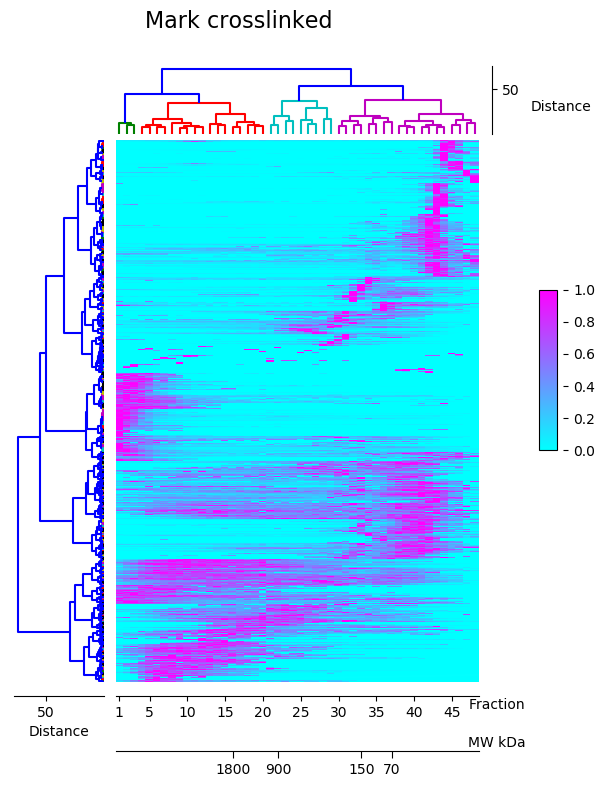

In [33]:
plt.style.use('default')
plot_experiment(
     mark_crosslinked.apply(norm_max, axis=1),
     method='ward', 
     metric='euclidean',
     cluster_columns = True,
     order_row_and_columns= False,
     color_map_id='cool',
     figsize=(6, 8),
     cut_distance_cols=40,
     cut_distance_rows=2,
     step_first_x = 5,
     title='Mark crosslinked',
     fig_name = 'Mark_crosslinked.svg',
     add_second_axis={'label':'MW kDa',
                      'values': {
                      16:'1800', 
                      22:'900', 
                      33:'150', 
                      37:'70', 
                       
                      } 
                      },
    height_ratios=[1, 8],
    hspace=0.02,
    get_clusters=False
     )


## A look to the Mark's native dataset

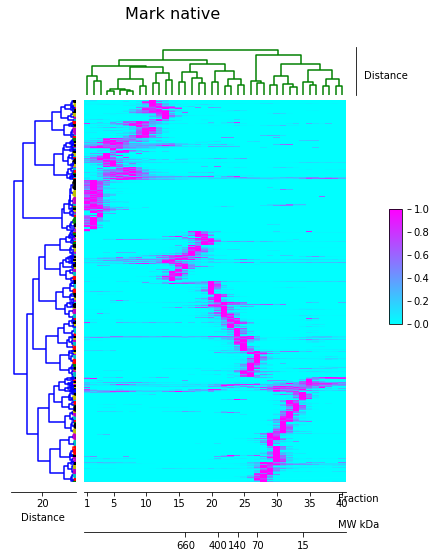

In [5]:
plot_experiment(
     mark_native.apply(norm_max, axis=1),
     method='ward', 
     metric='euclidean',
     cluster_columns = True,
     order_row_and_columns= False,
     color_map_id='cool',
     figsize=(6, 8),
     cut_distance_cols=40,
     cut_distance_rows=2,
     step_first_x = 5,
     title='Mark native',
     fig_name = 'Mark_native.svg',
     add_second_axis={'label':'MW kDa',
                      'values': {
                      16:'660', 
                      21:'400', 
                      24:'140', 
                      27:'70', 
                      34:'15',  
                      }
                     },
    height_ratios=[1, 8],
    hspace=0.02,
    get_clusters=False
     )

## Prepare Thomas data.
We extract the native datasat of Thomas' experimet with the SEC1000 column.

In [6]:
#the dataset does not need cleaning
#we extract 48 columns from the average of 3 replicates of the SEC 1000
in_file = 'test_small/Thomas_sec1000/LFQ-intensity-E3020-E3024-E3027_0_0_0.6.txt'
df = pd.DataFrame.from_csv(in_file, sep='\t')#a look the the daa
df_sec1000 = df.iloc[:,0:48]

### A look to the Thomas SEC1000 native dataset

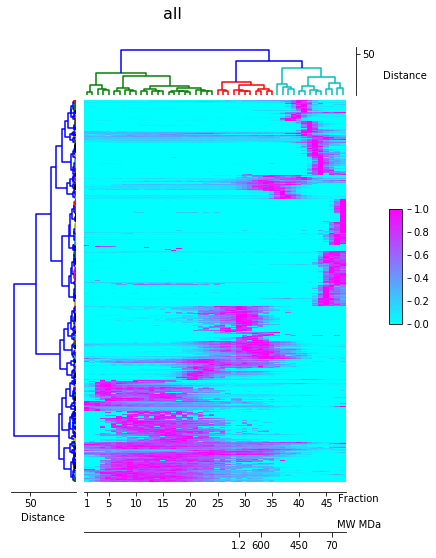

In [7]:
#create the plot
df = plot_experiment(
     df_sec1000.apply(norm_max,axis=1),
     method='ward', 
     metric='euclidean',
     cluster_columns = True,
     order_row_and_columns= False,
     color_map_id='cool',
     figsize=(6, 8),
     cut_distance_cols=40,
     cut_distance_rows=2,
     step_first_x = 5,
     title='all',
     fig_name = 'all.svg',
     add_second_axis={'label':'MW MDa',
                      'values': {
                      29:'1.2', 
                      33:'600', 
                      40:'450', 
                      46:'70', 
                      } 
                      },
    height_ratios=[1, 8],
    hspace=0.02,
    get_clusters=False
     )

## Finally, we prepare the preliminary data of  Fernando

In [8]:
#import data and remove rubbish entires
in_file = 'test_small/proteinGroups.txt'
test_df = pd.DataFrame.from_csv(in_file, sep='\t')
dsc_diz = dict(zip(test_df.index.values, test_df['Fasta headers']))
df = clean(test_df)
df_fernando = get_data(df, 'LFQ intensity ', '', np.arange(1,11,1))

removed  44 Only identified by site
tot  44  entries removed
---------------
removed  29 Reverse
tot  73  entries removed
---------------
removed  32 Potential contaminant
tot  105  entries removed
---------------
removed  655 Peptide counts (unique)
tot  760  entries removed
---------------
got:  2241 protein now


### and we visulaize it

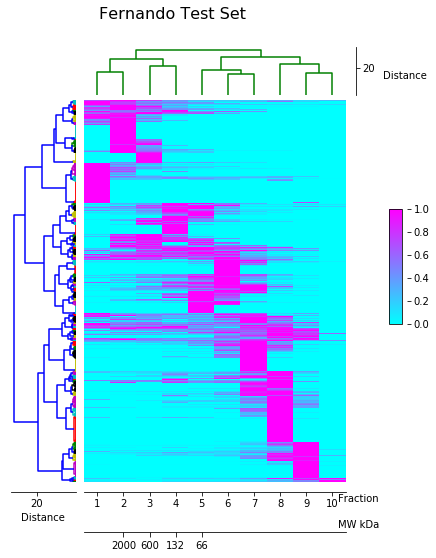

In [9]:
#create the plot
df = plot_experiment(
     df_fernando.apply(norm_max,1),
     method='ward', 
     metric='euclidean',
     cluster_columns = True,
     order_row_and_columns= False,
     color_map_id='cool',
     figsize=(6, 8),
     cut_distance_cols=40,
     cut_distance_rows=2,
     step_first_x = 1,
     title='Fernando Test Set',
     fig_name = 'Fernando_Test_Set.svg',
     add_second_axis={'label':'MW kDa',
                      'values': {
                      2:'2000', 
                      3:'600', 
                      4:'132', 
                      5:'66', 
                      } 
                      },
    height_ratios=[1, 8],
    hspace=0.02,
    get_clusters=False
     )


## Now we try to compare the same complex in different datasets

In [21]:
#a function to facilitate the line plot
#of a complex
def plot_line(df, ax, title, 
              new_ticks=['','2000','600','132','66','','','','',''],
              legend=False):
    #remove all zero entries
    df.fillna(0,inplace=True)
    df = df[(df.T != 0).any()]
    df.T.plot(ax=ax)
    ax.set_xticks( [n for n in range(df.shape[1])])
    ax.set_xticklabels( [n for n in range(df.shape[1])])
    if legend:
        ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5),  
              fancybox=True, framealpha=0.5, fontsize = 'small')
    else:
        ax.legend_.remove()
    ax.set_xlabel('MW kD', labelpad=1)
    ax.set_ylabel('relative intensity', rotation=90)
    ax.set_title(title)
    ax.set_xticklabels(new_ticks) 
#change the plot stile for the line plots
plt.style.use('ggplot')

## let's start with the proteasome core 

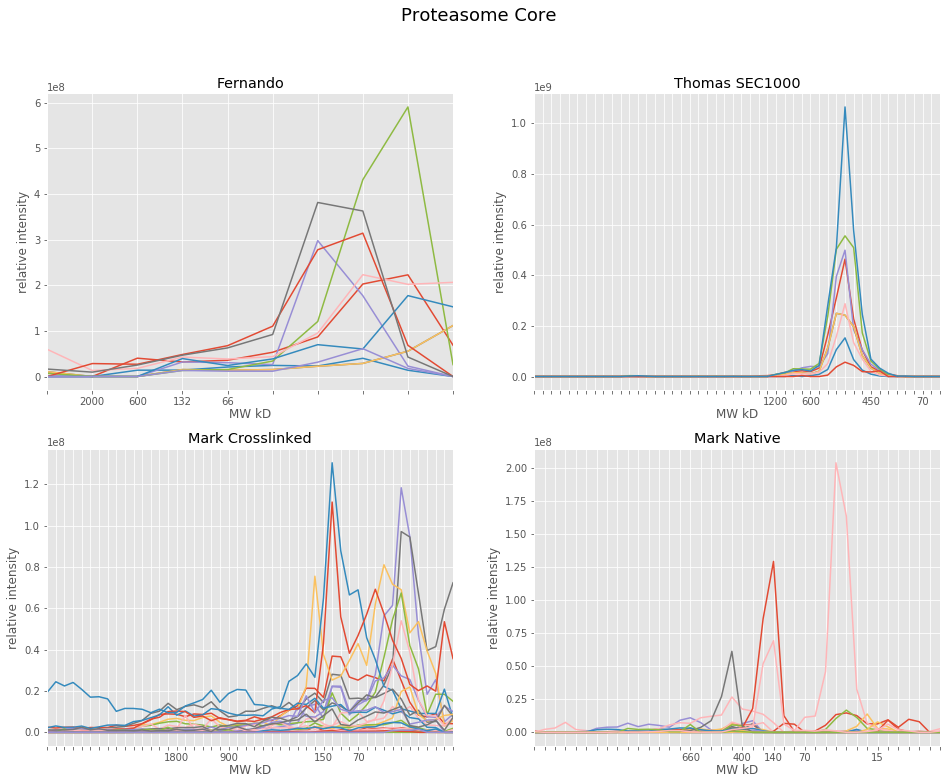

In [22]:
#for Thomas and Fernardo dataset
prots = [
'Tb927.3.780:mRNA-p1',
'Tb927.9.9670:mRNA-p1',
'Tb927.10.230:mRNA-p1',
'Tb927.10.6080:mRNA-p1;Tb11.v5.0200.1-p1',
'Tb927.10.6080:mRNA-p1;Tb11.v5.0200.1-p1',
'Tb927.10.290:mRNA-p1',
'Tb927.10.4710:mRNA-p1',
'Tb927.7.4420:mRNA-p1',
'Tb927.6.1260:mRNA-p1;Tb11.v5.0742.1-p1',
'Tb927.11.7020:mRNA-p1',
'Tb927.10.6030:mRNA-p1;Tb11.v5.0196.1-p1']

#prepare a template for 4 plots
fig, axes = plt.subplots(ncols = 2, nrows=2, figsize=(16,12))
fig.suptitle('Proteasome Core', fontsize=18)
#print 
plot_line(df_fernando.loc[prots], axes[0, 0], 'Fernando')

dict_size = {29:'1200', 
            33:'600', 
            40:'450', 
            46:'70'}
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,49,1)]
plot_line(df_sec1000.loc[[n.split(':')[0] for n in prots]], 
          axes[0, 1], 'Thomas SEC1000', 
          new_ticks=new_ticks)

#for Mark dataset
prots = [
'O14818;O14818-2;O14818-4;Q8TAA3-2',
'O95456;O95456-2',
'P20618',
'P25786;P25786-2',
'P25787',
'P25788;P25788-2',
'P25789;P25789-2',
'P28062;P28062-2',
'P28065;P28065-2',
'P28066;P28066-2',
'P28070',
'P28072',
'P28074;P28074-3;P28074-2',
'P40306',
'P49720',
'P49721',
'P60900;P60900-2;P60900-3',
'P61289;P61289-2;P61289-3',
'Q06323;Q06323-3;Q06323-2',
'Q14997;Q14997-2;Q14997-3;Q14997-4',
'Q5JS54;Q5JS54-2;Q5JS54-3',
'Q5VYK3',
'Q8TAA3;Q8TAA3-5',
'Q92530',
'Q969U7;Q969U7-2',
'Q99436;Q99436-2',
'Q9BT73',
'Q9UL46',
'Q9Y244'
]
dict_size = {
16:'1800', 
22:'900', 
33:'150', 
37:'70'
    }
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,mark_crosslinked.shape[1]+1,1)]
plot_line(mark_crosslinked.loc[prots], 
          axes[1, 0], 'Mark Crosslinked', 
          new_ticks=new_ticks)
dict_size = {
16:'660', 
21:'400', 
24:'140', 
27:'70', 
34:'15'}
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,mark_native.shape[1]+1,1)]
plot_line(mark_native.loc[prots], 
          axes[1, 1], 'Mark Native', 
          new_ticks=new_ticks)



## And the proteasome regulatory

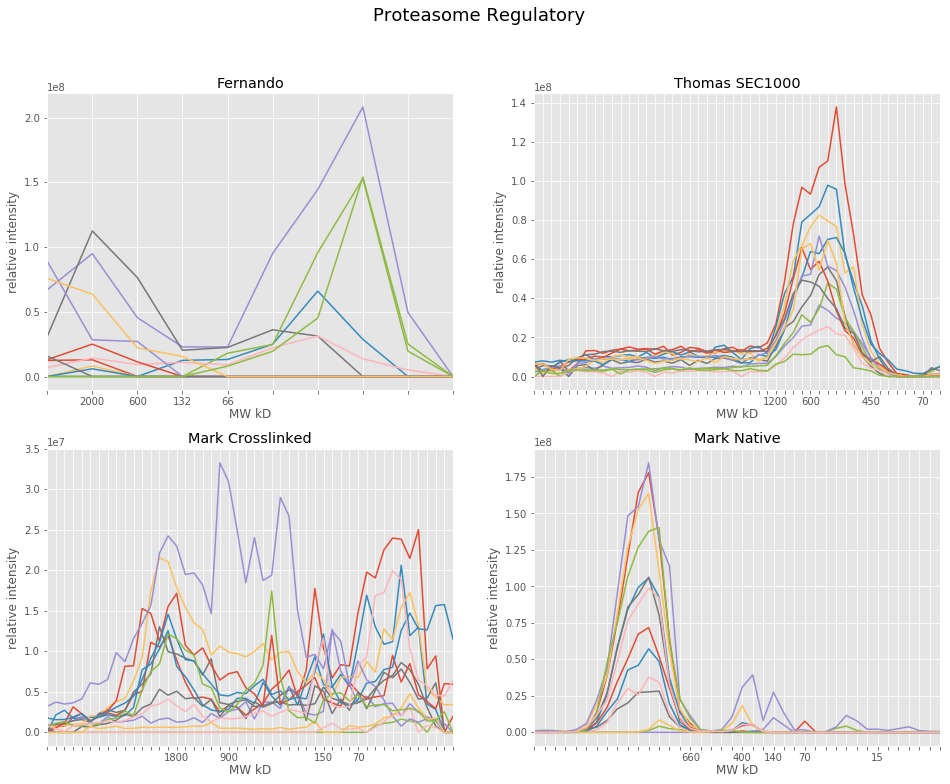

In [23]:
prots = ['Tb927.10.1550:mRNA-p1',
        'Tb927.10.15720:mRNA-p1',
        'Tb927.10.3030:mRNA-p1;Tb927.10.2980:mRNA-p1',
        'Tb927.10.3520:mRNA-p1',
        'Tb927.10.9740:mRNA-p1',
        'Tb927.11.14430:mRNA-p1',
        'Tb927.11.16030:mRNA-p1',
        'Tb927.11.3740:mRNA-p1',
        'Tb927.2.2440:mRNA-p1',
        'Tb927.6.1090:mRNA-p1',
        'Tb927.7.2500:mRNA-p1',
        'Tb927.7.2550:mRNA-p1',
        'Tb927.8.570:mRNA-p1']
#prepare a template for 4 plots
fig, axes = plt.subplots(ncols = 2, nrows=2, figsize=(16,12))
fig.suptitle('Proteasome Regulatory', fontsize=18)
#print 
plot_line(df_fernando.loc[prots], axes[0, 0], 'Fernando')

dict_size = {29:'1200', 
            33:'600', 
            40:'450', 
            46:'70'}
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,49,1)]
plot_line(df_sec1000.loc[[n.split(':')[0] for n in prots]], 
          axes[0, 1], 'Thomas SEC1000', 
          new_ticks=new_ticks)

prots = [
'O00231;O00231-2',
'O00232;O00232-2',
'O00233;O00233-2;O00233-3',
'O00487',
'O43242;O43242-2',
'O75832;O75832-2',
'P48556',
'P51665',
'P55036',
'P55036-2',
'Q13200;Q13200-3;Q13200-2',
'Q15008;Q15008-4;Q15008-3;Q15008-2',
'Q16401;Q16401-2',
'Q99460;Q99460-2',
'Q9UNM6;Q9UNM6-2'
]
dict_size = {
16:'1800', 
22:'900', 
33:'150', 
37:'70'
    }
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,mark_crosslinked.shape[1]+1,1)]
plot_line(mark_crosslinked.loc[prots], 
          axes[1, 0], 'Mark Crosslinked', 
          new_ticks=new_ticks)
dict_size = {
16:'660', 
21:'400', 
24:'140', 
27:'70', 
34:'15'}
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,mark_native.shape[1]+1,1)]
plot_line(mark_native.loc[prots], 
          axes[1, 1], 'Mark Native', 
          new_ticks=new_ticks)



### Notes
#### The Proteasome Core have some evidence of crosslinking in the Mark dataset.
#### The Proteasome Regulatory subunits shows some evidence of crosslinking in both Fernando and Mark Dataset
#### For protein complex prediction, the native separation produce the best profiles

## Let's look at the prefoldin complex

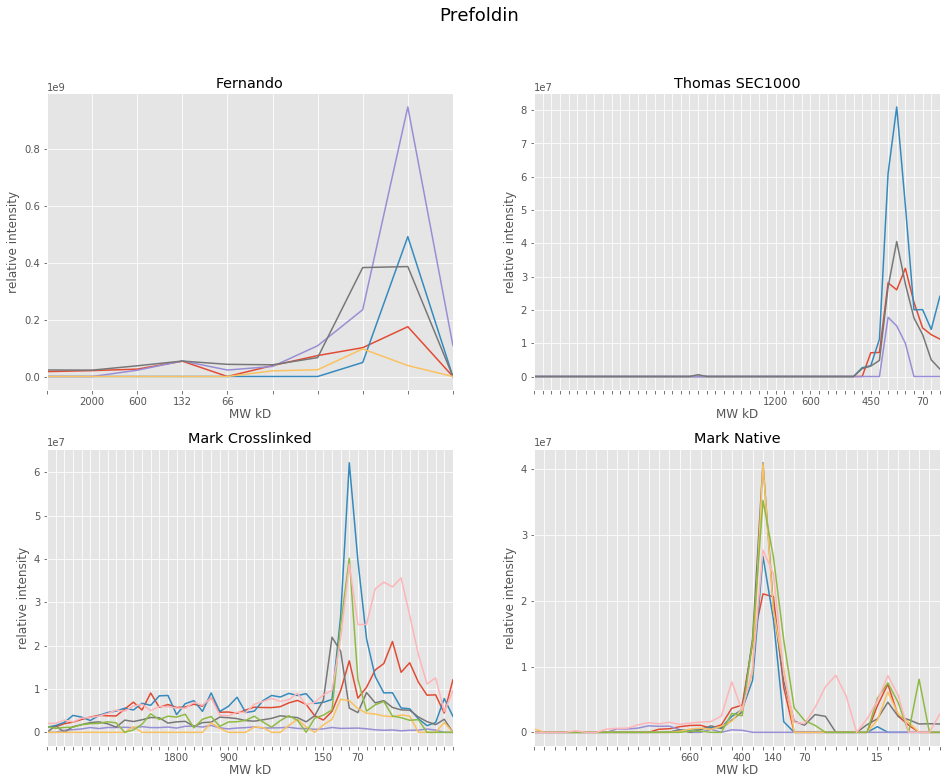

In [24]:
#prefoldin
prots = ['Tb927.11.12680:mRNA-p1',
    'Tb927.5.580:mRNA-p1',
    'Tb927.6.2340:mRNA-p1;Tb927.6.2280:mRNA-p1',
   'Tb927.7.2590:mRNA-p1',
    'Tb927.7.570:mRNA-p1']
#prepare a template for 4 plots
fig, axes = plt.subplots(ncols = 2, nrows=2, figsize=(16,12))
fig.suptitle('Prefoldin', fontsize=18)
#print 
plot_line(df_fernando.loc[prots], axes[0, 0], 'Fernando')

dict_size = {29:'1200', 
            33:'600', 
            40:'450', 
            46:'70'}
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,49,1)]
plot_line(df_sec1000.loc[[n.split(':')[0] for n in prots]], 
          axes[0, 1], 'Thomas SEC1000', 
          new_ticks=new_ticks)

prots = [
'O15212',
'O60925',
'O94763;O94763-3;O94763-2;O94763-4',
'P61758',
'Q99471;Q99471-3;Q99471-2',
'Q9NQP4',
'Q9UHV9'
    ]
dict_size = {
16:'1800', 
22:'900', 
33:'150', 
37:'70'
    }
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,mark_crosslinked.shape[1]+1,1)]
plot_line(mark_crosslinked.loc[prots], 
          axes[1, 0], 'Mark Crosslinked', 
          new_ticks=new_ticks)
dict_size = {
16:'660', 
21:'400', 
24:'140', 
27:'70', 
34:'15'}
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,mark_native.shape[1]+1,1)]
plot_line(mark_native.loc[prots], 
          axes[1, 1], 'Mark Native', 
          new_ticks=new_ticks)

### Notes
#### the Mark dataset show some evidences of crosslinking but the profile looks better in the native separation 

## Let's compare some transmembrane protein complexes

### Atp Syntase

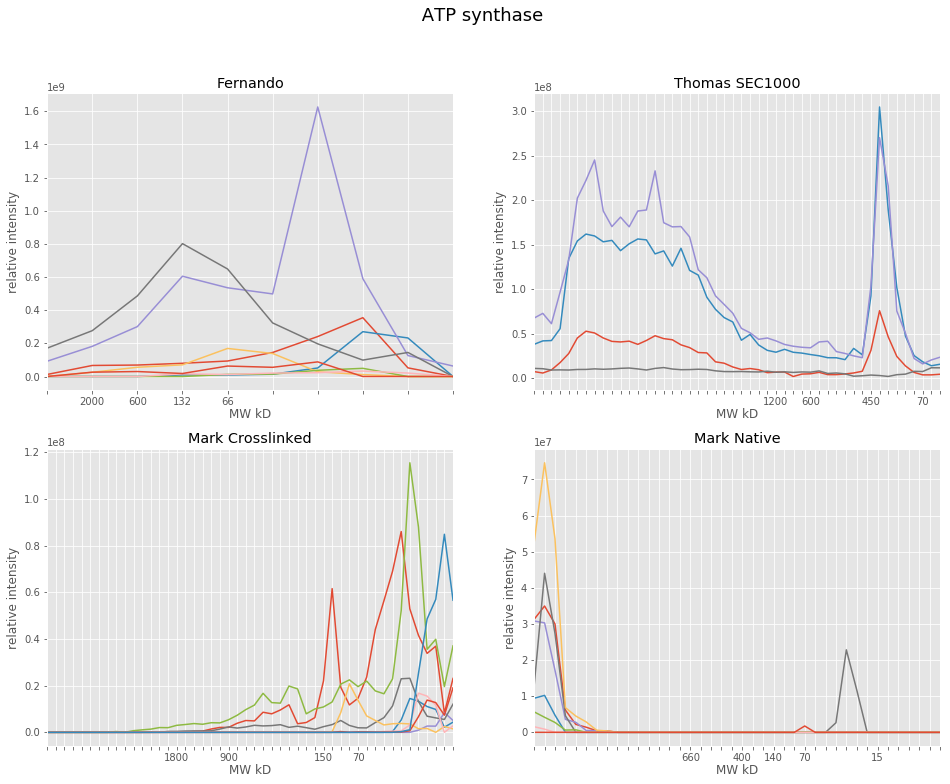

In [25]:
#atp syn
prots=['Tb927.10.180:mRNA-p1',
       'Tb927.6.4990:mRNA-p1',
       'Tb927.7.7430:mRNA-p1;Tb927.7.7420:mRNA-p1',
       'Tb927.3.1380:mRNA-p1',
'Tb927.11.11690:mRNA-p1',
'Tb927.10.3760:mRNA-p1',
'Tb927.11.9420:mRNA-p1',
'Tb927.10.730:mRNA-p1;Tb11.v5.0822.1-p1'       
] 

#prepare a template for 4 plots
fig, axes = plt.subplots(ncols = 2, nrows=2, figsize=(16,12))
fig.suptitle(' ATP synthase', fontsize=18)
#print 
plot_line(df_fernando.loc[prots], axes[0, 0], 'Fernando')

dict_size = {29:'1200', 
            33:'600', 
            40:'450', 
            46:'70'}
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,49,1)]
plot_line(df_sec1000.loc[[n.split(':')[0] for n in prots]], 
          axes[0, 1], 'Thomas SEC1000', 
          new_ticks=new_ticks)

prots = ['O75947;O75947-2',
'O75964;Q7Z4Y8',
'P00846',
'P03928',
'P24539',
'P25705-2',
'P30049',
'P36542',
'P36542-2',
'P48047',
'P56134;P56134-3',
'P56134-2;P56134-4',
'P56381;Q5VTU8',
'P56385',
'Q5TC12',
'Q5TC12-3;Q5TC12-2',
'Q8N5M1',
'Q99766;Q99766-3;Q99766-2',
'Q9NW81;Q9NW81-4;Q9NW81-5']





dict_size = {
16:'1800', 
22:'900', 
33:'150', 
37:'70'
    }
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,mark_crosslinked.shape[1]+1,1)]
plot_line(mark_crosslinked.loc[prots], 
          axes[1, 0], 'Mark Crosslinked', 
          new_ticks=new_ticks)
dict_size = {
16:'660', 
21:'400', 
24:'140', 
27:'70', 
34:'15'}
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,mark_native.shape[1]+1,1)]
plot_line(mark_native.loc[prots], 
          axes[1, 1], 'Mark Native', 
          new_ticks=new_ticks)


#mark_crosslinked.loc[prots]

### Notes
#### the Fernando and Mark dataset show some evidences of crosslinking.
#### the Fernando dataset looks  promising 

## SNAP (part of the SNARE complex)

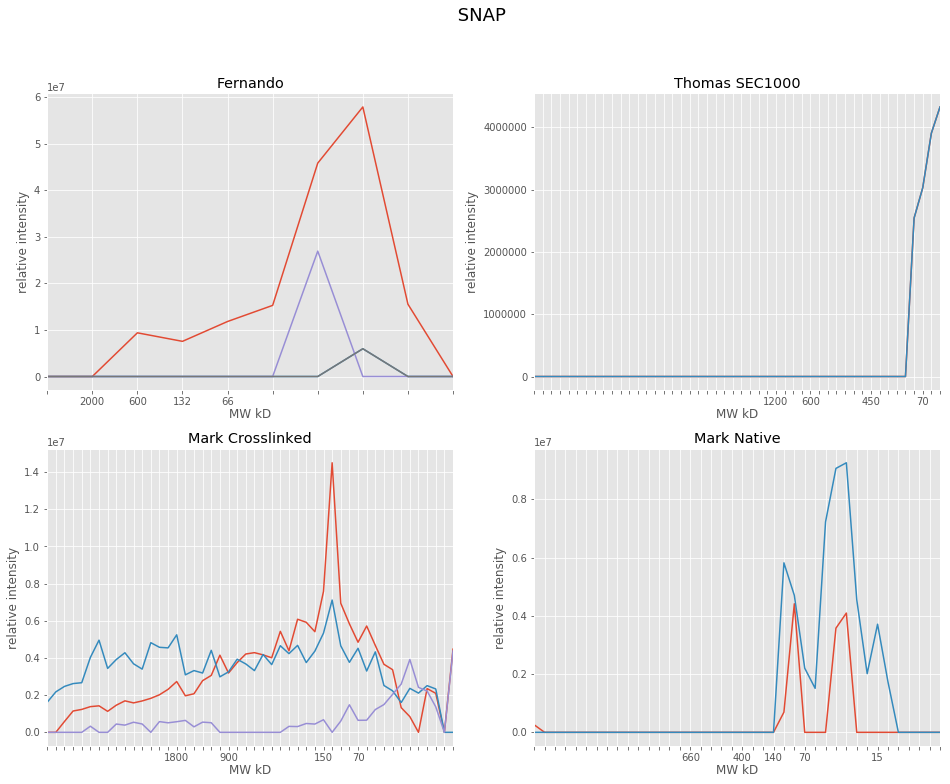

In [27]:
prots = [
'Tb927.10.2940:mRNA-p1',
'Tb927.11.10270:mRNA-p1',
'Tb927.11.16080:mRNA-p1',
'Tb927.11.10270:mRNA-p1']


#prepare a template for 4 plots
fig, axes = plt.subplots(ncols = 2, nrows=2, figsize=(16,12))
fig.suptitle(' SNAP', fontsize=18)
#print 
plot_line(df_fernando.loc[prots], axes[0, 0], 'Fernando')

dict_size = {29:'1200', 
            33:'600', 
            40:'450', 
            46:'70'}
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,49,1)]
plot_line(df_sec1000.loc[[n.split(':')[0] for n in prots]], 
          axes[0, 1], 'Thomas SEC1000', 
          new_ticks=new_ticks)

prots = ['O00161;O00161-2',
'P60880;P60880-2',
'O95721',
'O75971;O75971-2',
'O95295']
dict_size = {
16:'1800', 
22:'900', 
33:'150', 
37:'70'
    }
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,mark_crosslinked.shape[1]+1,1)]
plot_line(mark_crosslinked.loc[prots], 
          axes[1, 0], 'Mark Crosslinked', 
          new_ticks=new_ticks)
dict_size = {
16:'660', 
21:'400', 
24:'140', 
27:'70', 
34:'15'}
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,mark_native.shape[1]+1,1)]
plot_line(mark_native.loc[prots], 
          axes[1, 1], 'Mark Native', 
          new_ticks=new_ticks)

### Notes
#### the Mark dataset show some evidences of crosslinking 

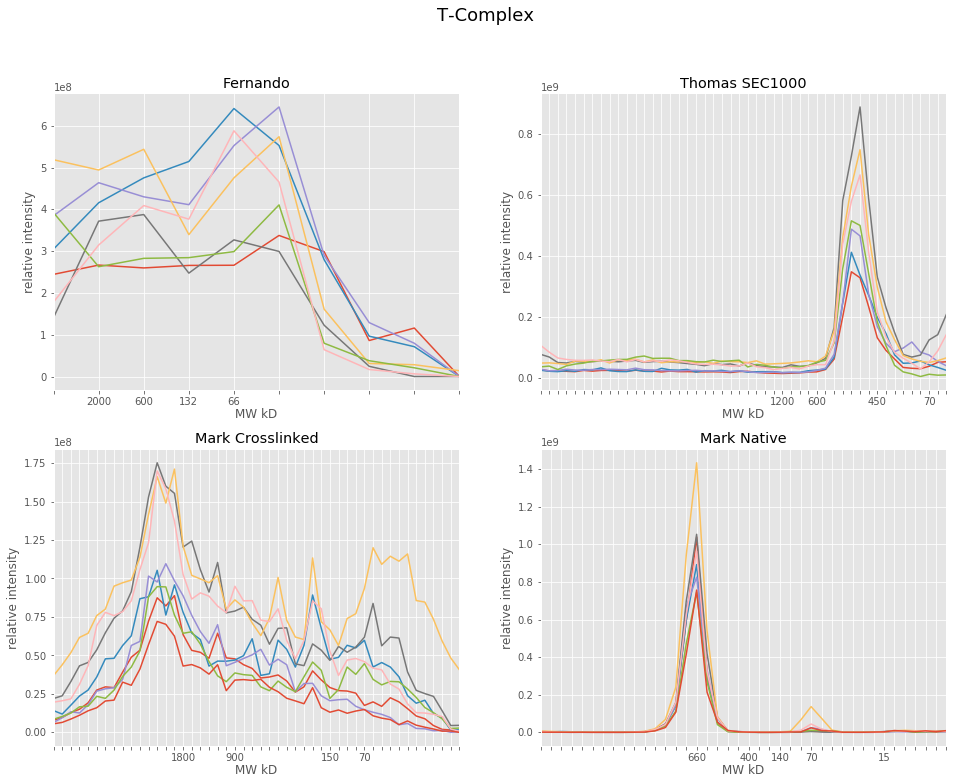

In [30]:
#t-complex
prots = [
             'Tb927.10.1060:mRNA-p1',
             'Tb927.11.16760:mRNA-p1',
             'Tb927.10.8190:mRNA-p1',
             'Tb927.11.14250:mRNA-p1',
             'Tb927.8.3150:mRNA-p1',
             'Tb927.11.3240:mRNA-p1',
             'Tb927.11.1900:mRNA-p1'
                   ]
#prepare a template for 4 plots
fig, axes = plt.subplots(ncols = 2, nrows=2, figsize=(16,12))
fig.suptitle('T-Complex', fontsize=18)
#print 
plot_line(df_fernando.loc[prots], axes[0, 0], 'Fernando')

dict_size = {29:'1200', 
            33:'600', 
            40:'450', 
            46:'70'}
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,49,1)]
plot_line(df_sec1000.loc[[n.split(':')[0] for n in prots]], 
          axes[0, 1], 'Thomas SEC1000', 
          new_ticks=new_ticks)

prots = [
'Q96SF2;A6NM43',
'P17987',
'P40227;P40227-2',
'P48643',
'P48643-2',
'P49368;P49368-2',
'P50990;P50990-2;P50990-3',
'P50991;P50991-2;P05543',
'P78371;P78371-2',
'Q92526;Q92526-3;Q92526-2',
'Q99832;Q99832-3;Q99832-4;Q99832-2',
'Q9NUJ3']
dict_size = {
16:'1800', 
22:'900', 
33:'150', 
37:'70'
    }
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,mark_crosslinked.shape[1]+1,1)]
plot_line(mark_crosslinked.loc[prots], 
          axes[1, 0], 'Mark Crosslinked', 
          new_ticks=new_ticks)
dict_size = {
16:'660', 
21:'400', 
24:'140', 
27:'70', 
34:'15'}
new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,mark_native.shape[1]+1,1)]
plot_line(mark_native.loc[prots], 
          axes[1, 1], 'Mark Native', 
          new_ticks=new_ticks)

### Notes
#### the Fernando and Mark dataset show evidences of crosslinking, The native profile looks better.

### Conclusions
#### I think we are  comparing pears with apple. The targets of the Mark dataset were  membrane complexes. As the membranes of Tryp and Human are very different, it is difficult to find membrane complexes in common that can be used to benchmark the crosslinking efficency. Also, the lysis tecnique is very different. Our methods (cryomilling) shuld be superior in crosslinking solube complexes. 

# Question
## Using Fernando data, which proteins have the most similar profile?
#### we will use the pearson correlation coefficent to rank protein profiles according their similarities
#### we will use only proteins that peaks in fractions 2(included) to 5(excluded)

In [159]:
#first we select signals that are present at least in two fractions
df_fernando['zero_counts']= (df_fernando == 0).astype(int).sum(axis=1)
selection = df_fernando[df_fernando['zero_counts']<=8]
del selection['zero_counts']
del df_fernando['zero_counts']
#then we select the signal that peaks inbetween fractions 2 to 6
selection['max_fraction'] = [int(n.split(' ')[-1]) for n in selection.idxmax(axis=1)]
selection = selection[ (selection['max_fraction']<=4) & (selection['max_fraction']>1) ]
selection.head()
del selection['max_fraction']

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [160]:
print 'after filtering'
print 'we are left with %s proteins' % selection.shape[0]
#selection.head()

after filtering
we are left with 394 proteins


#### Lets visualize this set of proteins

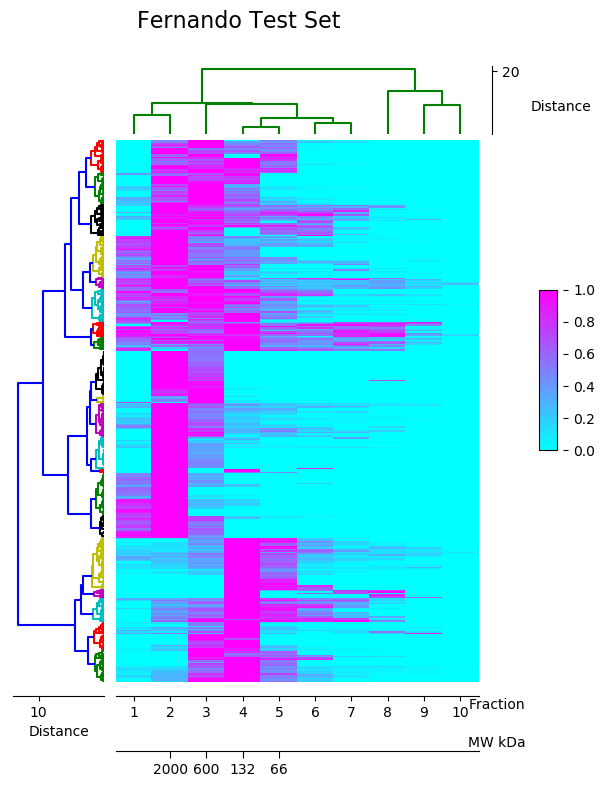

In [154]:
plt.style.use('default')
#create the plot
df = plot_experiment(
     selection.apply(norm_max,1),
     method='ward', 
     metric='euclidean',
     cluster_columns = True,
     order_row_and_columns= False,
     color_map_id='cool',
     figsize=(6, 8),
     cut_distance_cols=40,
     cut_distance_rows=2,
     step_first_x = 1,
     title='Fernando Test Set',
     fig_name = 'Fernando_Test_Set.svg',
     add_second_axis={'label':'MW kDa',
                      'values': {
                      2:'2000', 
                      3:'600', 
                      4:'132', 
                      5:'66', 
                      } 
                      },
    height_ratios=[1, 8],
    hspace=0.02,
    get_clusters=False
     )


In [156]:

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
res_corr = get_top_abs_correlations(selection.T, 20)
res_corr.head()

Top Absolute Correlations


Protein IDs                              Protein IDs          
Tb927.7.5660:mRNA-p1                     Tb927.8.4390:mRNA-p1     1.000000
Tb927.10.13510:mRNA-p1                   Tb927.9.13330:mRNA-p1    0.999998
Tb927.4.2200:mRNA-p1                     Tb927.9.5590:mRNA-p1     0.999998
Tb927.11.13920:mRNA-p1                   Tb927.11.6430:mRNA-p1    0.999998
Tb11.02.5430b.1-p1;Tb11.02.5430:mRNA-p1  Tb927.11.4160:mRNA-p1    0.999997
dtype: float64

In [157]:
#prepare an helper function
from string import strip
def extract_dict(string):
    res = {}
    item_list = string.split(' | ')
    for item in item_list:
        if '=' in item:
            key = strip(item.split('=')[0])
            value = strip(item.split('=')[1])
            res[key]=value
    return res
            
def plot_pairs(prots): 
    fig, axes = plt.subplots(ncols = 2, nrows=1, figsize=(12,4))
    fig.suptitle('', fontsize=18)

    plot_line(selection.loc[prots], axes[0], 'Fernando')

    dict_size = {29:'1200', 
            33:'600', 
            40:'450', 
            46:'70'}
    new_ticks = [dict_size[n] if n in dict_size else '' for n in range(1,49,1)]
    try:
        df_sec1000.loc[[n.split(':')[0] for n in prots]]
        plot_line(df_sec1000.loc[[n.split(':')[0] for n in prots]], 
          axes[1], 'Thomas SEC1000', 
          new_ticks=new_ticks)
    except:
        pass
    #plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5),  
                #fancybox=True, framealpha=0.5, fontsize = 'small')

    #L=plt.legend()
    #text = L.get_texts()
    #for index, prot in enumerate(text):
        #prot_id = prot.get_text()
        #L.get_texts()[index].set_text(prot_id+'\n'+extract_dict(dsc_diz[prot_id])['gene_product'])  
        #print extract_dict(dsc_diz[prot])['gene_product']
       
    plt.show()
        

## let's plot the top 20 pairs in Fernando dataset
### and compare the profiles with the Thomas SEC1000

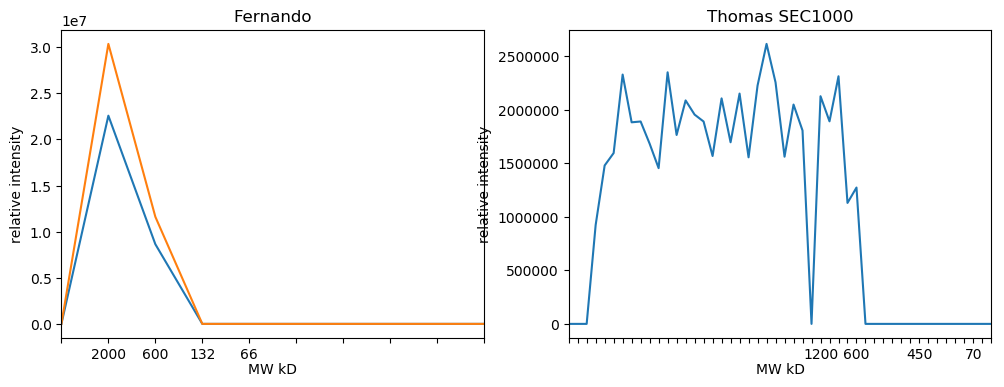

Tb927.7.5660:mRNA-p1 hypothetical protein, conserved
Tb927.8.4390:mRNA-p1 translation initiation factor eIF-2B subunit beta, putative


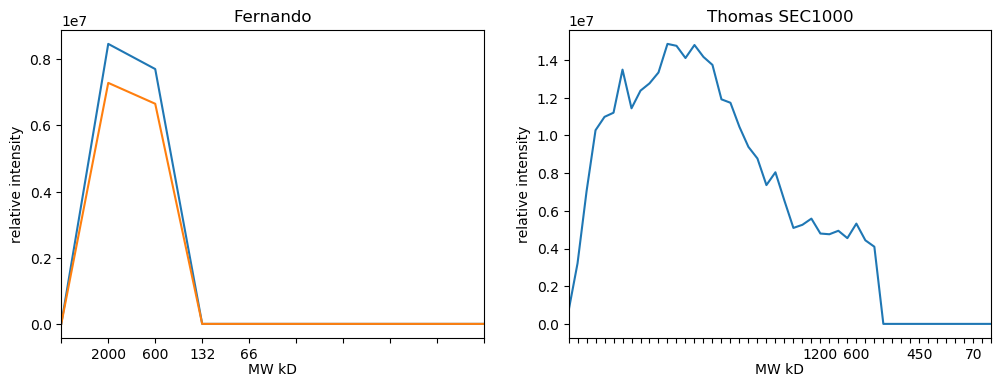

Tb927.10.13510:mRNA-p1 zinc metallopeptidase, putative
Tb927.9.13330:mRNA-p1 hypothetical protein, conserved


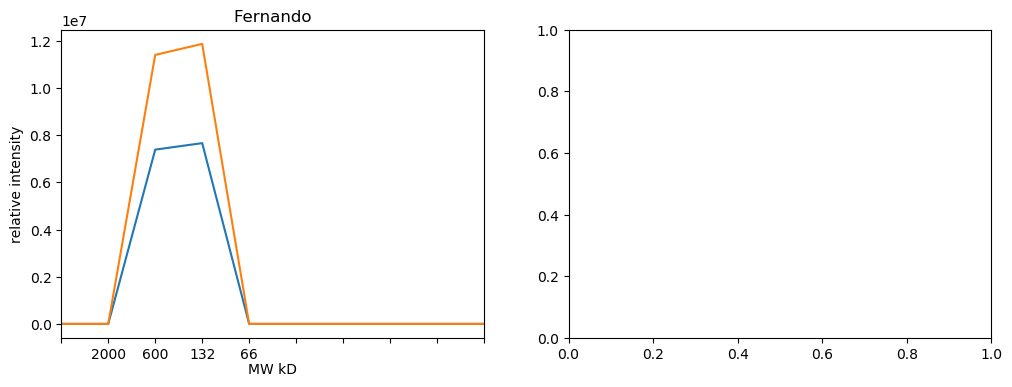

Tb927.4.2200:mRNA-p1 Sec7 domain containing protein, putative
Tb927.9.5590:mRNA-p1 DNA topoisomerase ii


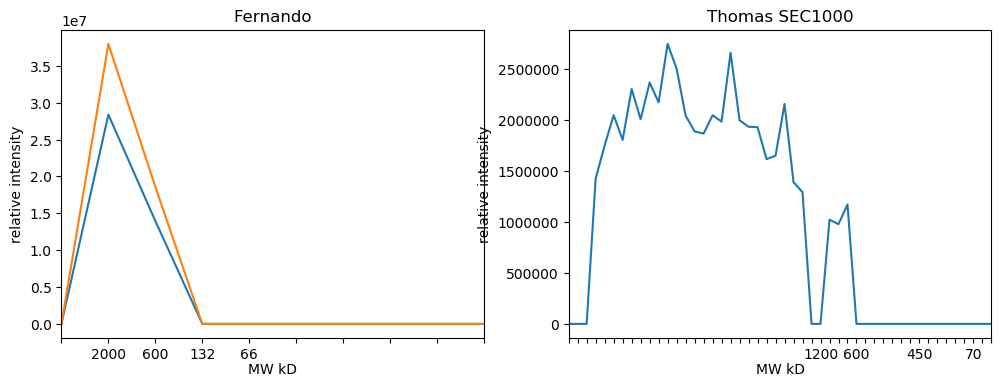

Tb927.11.13920:mRNA-p1 kinesin-II 85 Kd subunit, putative
Tb927.11.6430:mRNA-p1 hypothetical protein, conserved


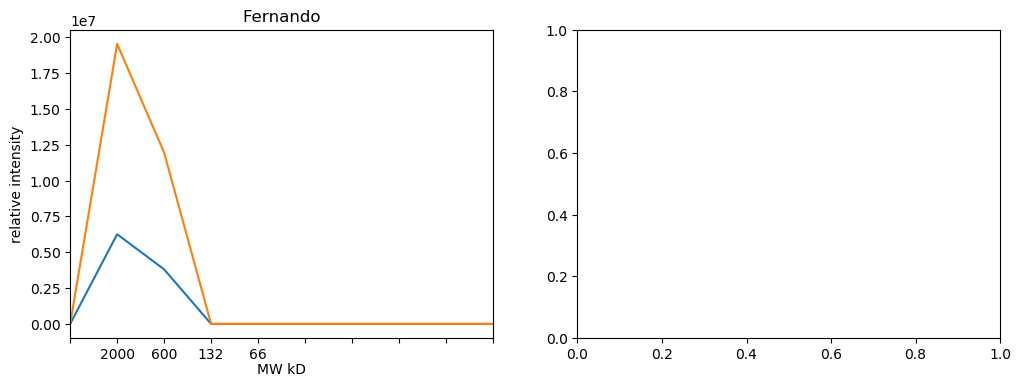

Tb11.02.5430b.1-p1;Tb11.02.5430:mRNA-p1 hypothetical protein, conserved
Tb927.11.4160:mRNA-p1 predicted C2 domain protein


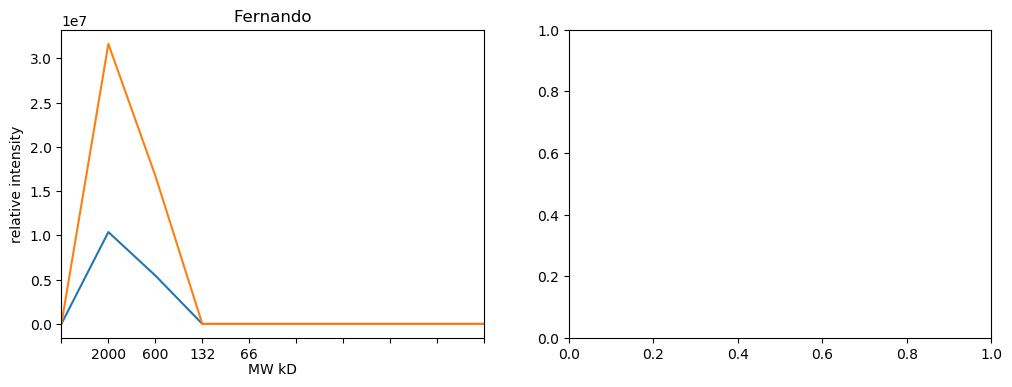

Tb927.5.500:mRNA-p1;Tb11.v5.0218.1-p1 hypothetical protein, conserved
Tb927.11.6810:mRNA-p1;Tb11.v5.0901.1-p1 tubulin-tyrsoine ligase-like protein, putative


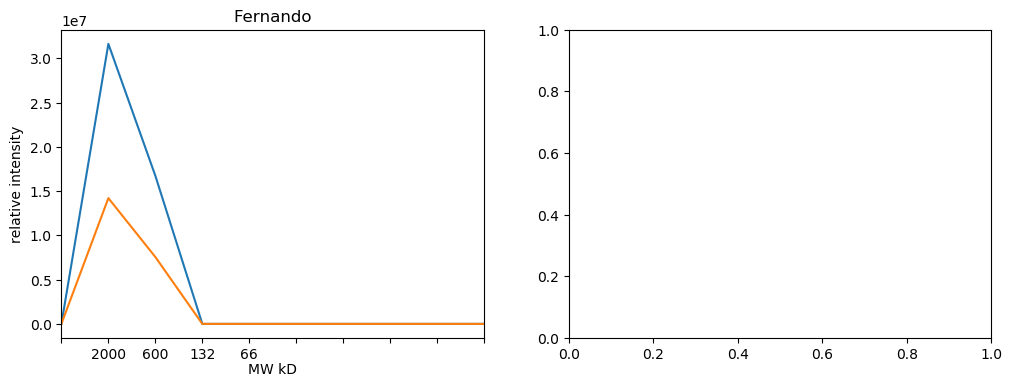

Tb927.11.6810:mRNA-p1;Tb11.v5.0901.1-p1 tubulin-tyrsoine ligase-like protein, putative
Tb927.6.2390:mRNA-p1 conserved hypothetical protein, putative


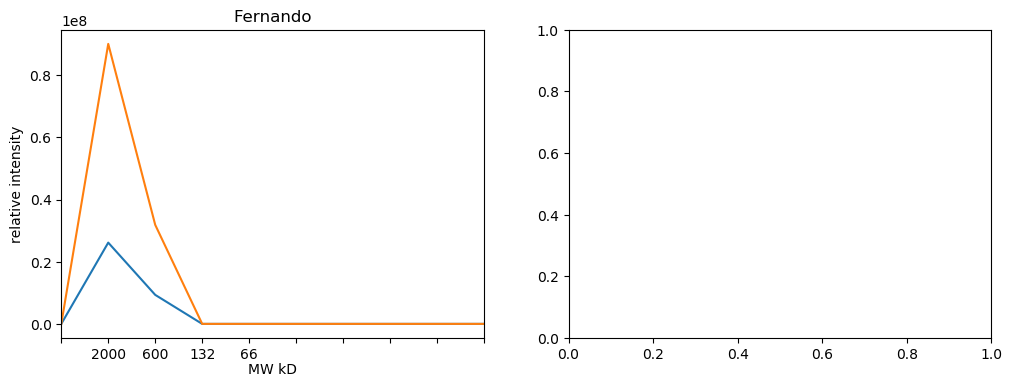

Tb927.10.13180:mRNA-p1 Nrap protein, putative
Tb927.11.15450:mRNA-p1 Basal body protein


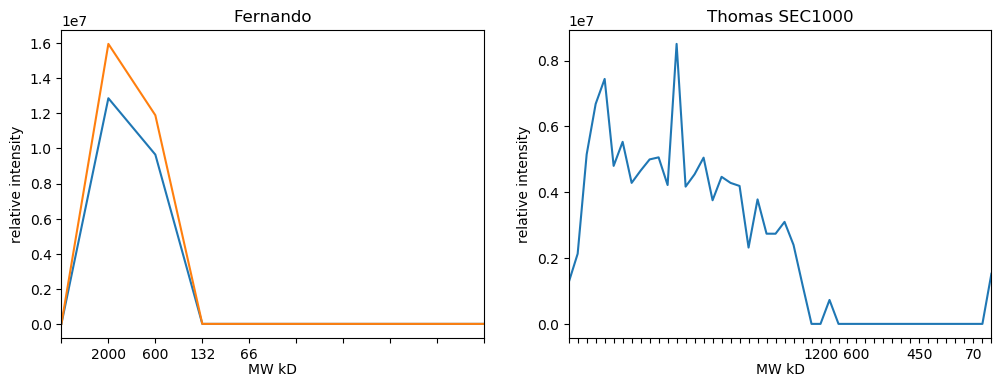

Tb927.10.2880:mRNA-p1 Voltage-dependent calcium channel subunit, putative
Tb927.7.3880:mRNA-p1 Basal body protein


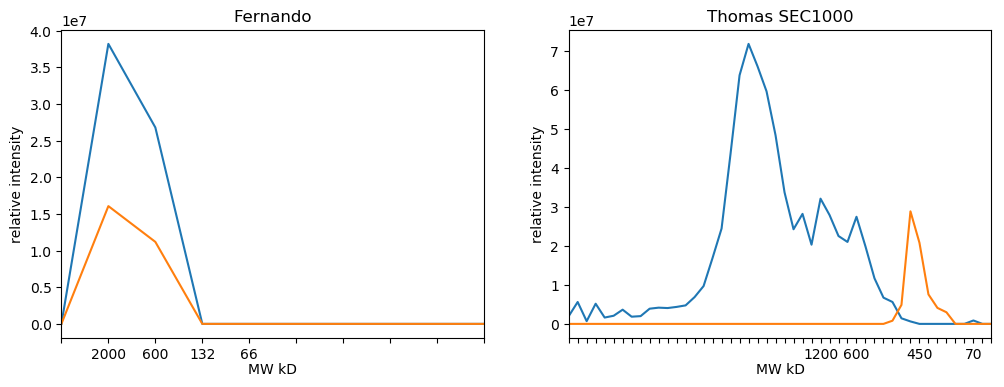

Tb927.11.6790:mRNA-p1 predicted WD40 repeat protein
Tb927.2.2340:mRNA-p1 Glycerophosphoryl diester phosphodiesterase family, putative


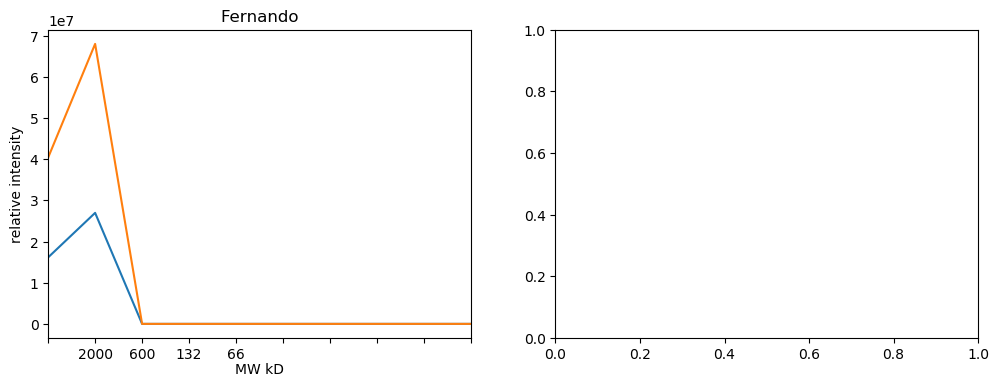

Tb927.1.2600:mRNA-p1 pumilio/PUF RNA binding protein 9
Tb927.11.8210:mRNA-p1;Tb11.v5.0572.1-p1;Tb11.v5.0573.1-p1 RAD50 DNA repair-like protein


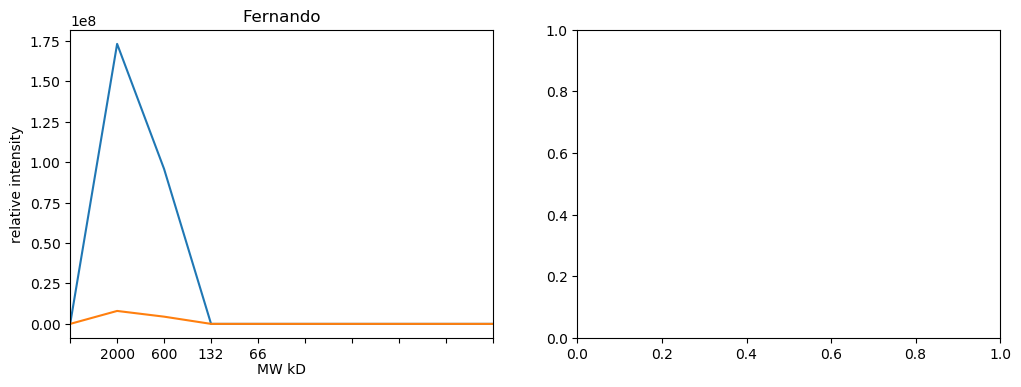

Tb927.4.450:mRNA-p1 coatomer alpha subunit, putative
Tb927.4.4550:mRNA-p1 hypothetical protein, conserved


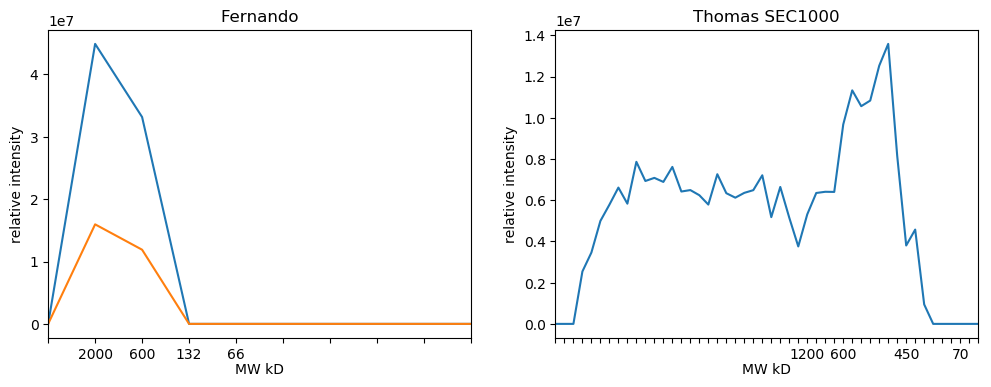

Tb927.4.3810:mRNA-p1 DNA-directed RNA polymerase II subunit 2, putative
Tb927.7.3880:mRNA-p1 Basal body protein


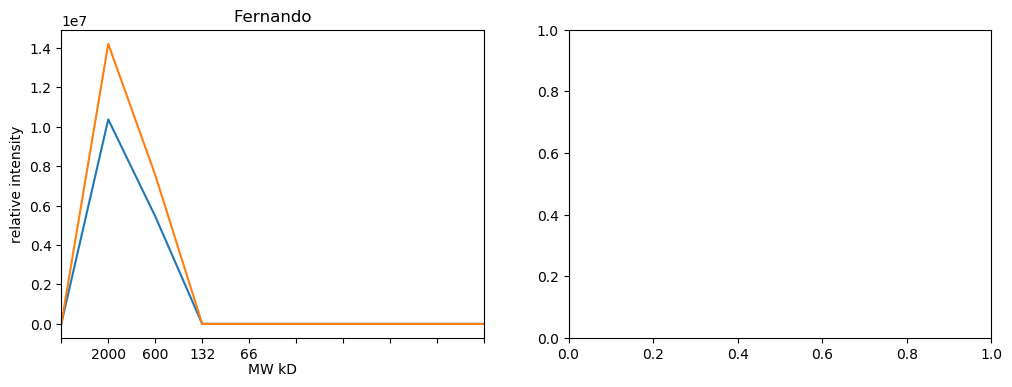

Tb927.5.500:mRNA-p1;Tb11.v5.0218.1-p1 hypothetical protein, conserved
Tb927.6.2390:mRNA-p1 conserved hypothetical protein, putative


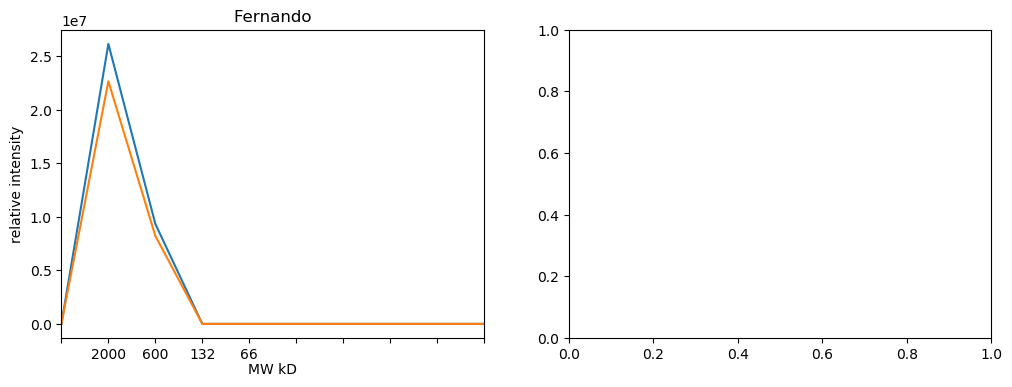

Tb927.10.13180:mRNA-p1 Nrap protein, putative
Tb927.11.350:mRNA-p1 RNA-binding protein, putative


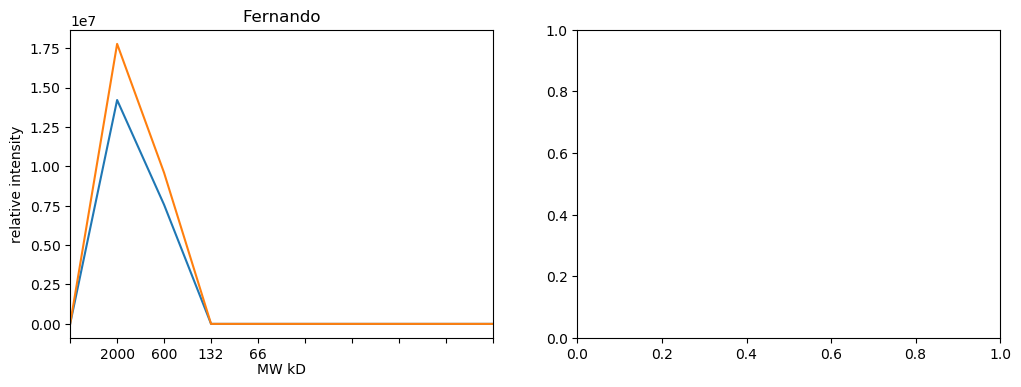

Tb927.6.2390:mRNA-p1 conserved hypothetical protein, putative
Tb927.7.2650:mRNA-p1 hypothetical protein, conserved


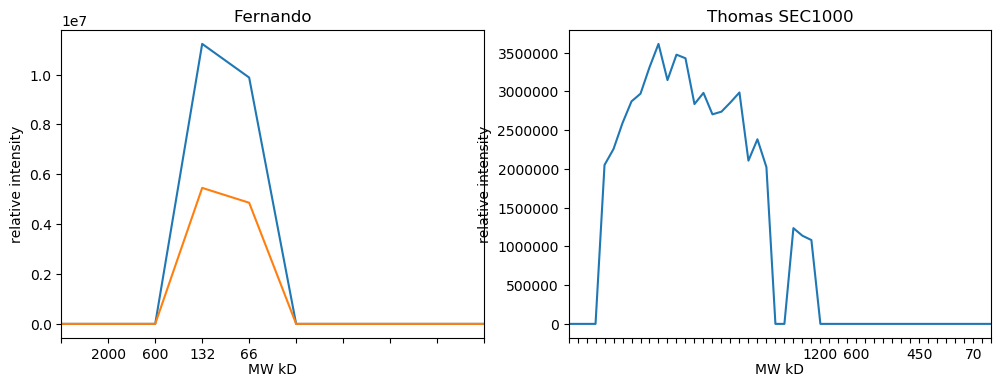

Tb927.8.7350:mRNA-p1;Tb927.8.7340:mRNA-p1 trans-sialidase, putative
Tb927.9.3770:mRNA-p1 hypothetical protein, conserved


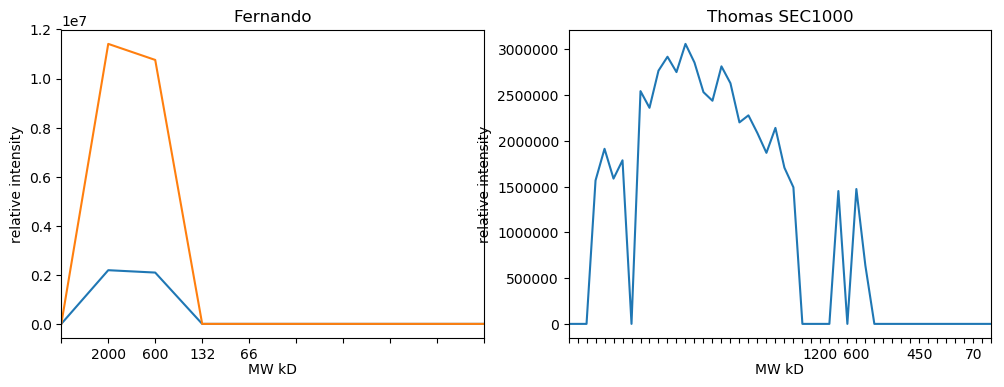

Tb927.6.2000:mRNA-p1 spliceosome-associated protein, putative
Tb927.9.13970:mRNA-p1 hypothetical protein, conserved


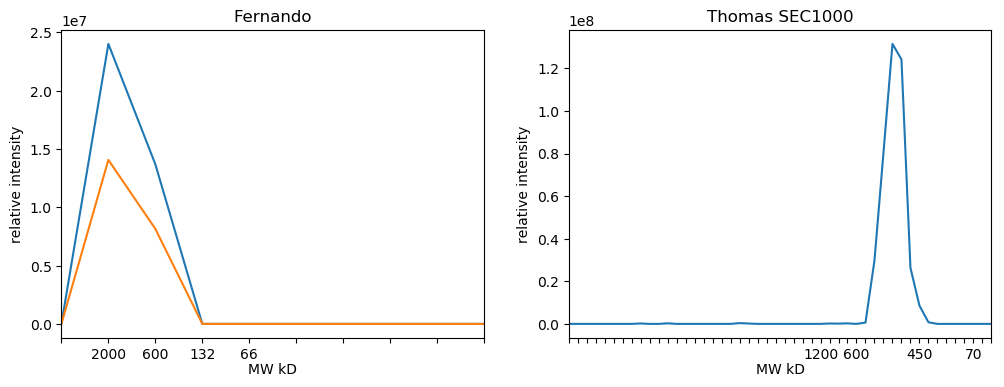

Tb927.8.7380:mRNA-p1;Tb927.4.5050:pseudogenic_transcript-p1 dihydrolipoamide dehydrogenase, point mutation
Tb927.9.10920:mRNA-p1 kinetoplastid kinetochore protein 3


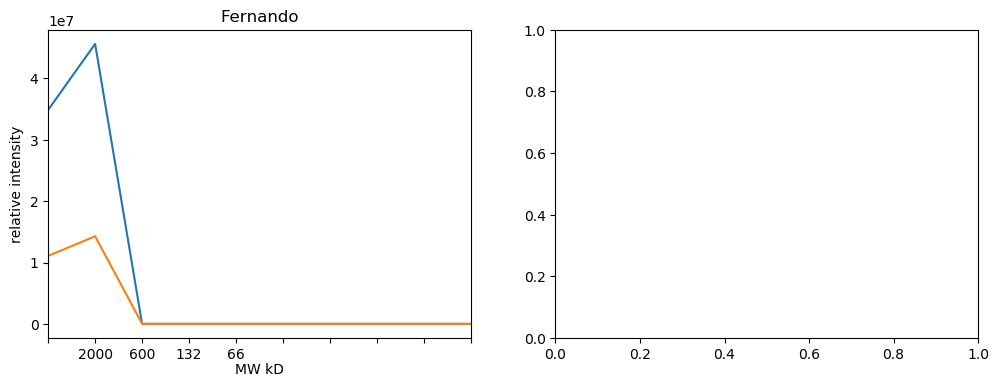

Tb927.3.4970:mRNA-p1 hypothetical protein, conserved
Tb927.9.2075:mRNA-p1 hypothetical protein


In [158]:
for pairs in res_corr.index.values:
    #print pairs
    prots =[
             pairs[0],
             pairs[1]]
    plot_pairs(prots)
    for prot in pairs:
        print prot+' '+extract_dict(dsc_diz[prot])['gene_product']
    


## Conclusion
### Looks good! we are finding putative protein complexes that where undetected in the SEC1000 of Thomas
### I think it is worth to try increasing the amunt of crosslinker as, at the moment, we have a set of 400 proteins with a profile indicative of a protein complex
### Probably we will identify a set of protein complexes that is diferent from the one identified with the native experiments of Thomas